In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import os
import cv2 as cv

2025-04-04 13:31:32.106388: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 13:31:51.562029: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 13:31:51.587388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-04 13:32:08.910919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)

In [4]:
train_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)


Found 1225 images belonging to 2 classes.


In [5]:
val_generator=datagen.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)


Found 1225 images belonging to 2 classes.


0.0
1.0


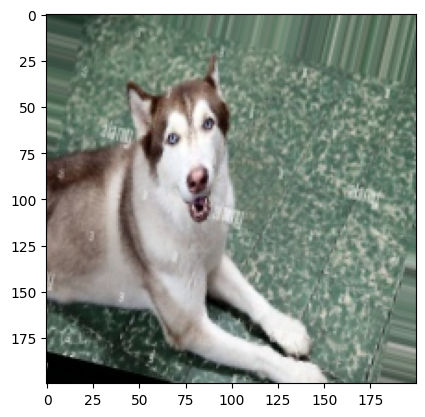

In [15]:
batch_images,batch_labels=next(train_generator)
index=0
plt.imshow(batch_images[index])
print(batch_labels[index])
print(np.max(batch_images))

In [10]:
def create_features_labels(data_path):
    husky_train=os.listdir(f'{data_path}/husky')
    wolf_train=os.listdir(f'{data_path}/wolf')
    # Create a random mix of husky and wolf images
    mixed_data = [(img, 0) for img in husky_train] + [(img, 1) for img in wolf_train]
    random.shuffle(mixed_data)

    # Separate features (X) and labels (Y)
    images_names = [item[0] for item in mixed_data]
    Y = np.array([item[1] for item in mixed_data])


    X=np.array([ cv.resize(cv.imread(f"{data_path}/{i.split('_')[0]}/{i}"),(200,200))/255 for i in images_names ])
    return X,Y



In [12]:
X,Y=create_features_labels("data/train")


NameError: name 'create_features_labels' is not defined

(200, 200, 3)
0


1.0


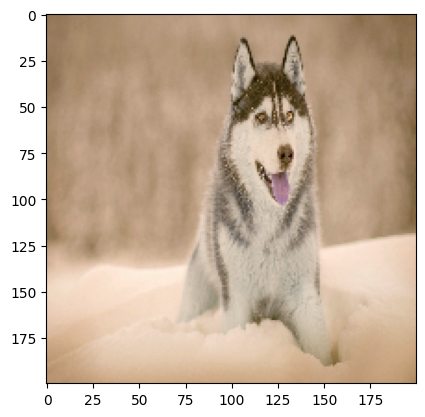

In [9]:
index=16
print(X[index].shape)
plt.imshow(X[index])
print(Y[index])
print(np.max(X))


In [7]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(200, 200,3)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(100, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(100, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(200, activation='relu'),

    keras.layers.Dropout(0.3),


    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2025-04-02 13:56:31.527246: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21160000 exceeds 10% of free system memory.
2025-04-02 13:56:31.565106: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21160000 exceeds 10% of free system memory.
2025-04-02 13:56:31.625188: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21160000 exceeds 10% of free system memory.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 100)       57700     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 100)       90100     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 100)       0

In [ ]:
callback=keras.callbacks.EarlyStopping(monitor="loss",patience=10)

model.fit(train_generator,validation_data=val_generator,epochs=100,callbacks=callback)

Epoch 1/100


2025-04-04 13:32:36.011182: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 321159168 exceeds 10% of free system memory.
2025-04-04 13:32:37.968117: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80289792 exceeds 10% of free system memory.
2025-04-04 13:32:38.379412: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 120435200 exceeds 10% of free system memory.
2025-04-04 13:32:39.779334: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29491200 exceeds 10% of free system memory.
2025-04-04 13:32:39.903472: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27084800 exceeds 10% of free system memory.


39/39 [==============================] - 382s 9s/step - loss: 0.4615 - accuracy: 0.8082 - val_loss: 0.3735 - val_accuracy: 0.8327
Epoch 2/100
39/39 [==============================] - 152s 4s/step - loss: 0.3670 - accuracy: 0.8392 - val_loss: 0.3553 - val_accuracy: 0.8482
Epoch 3/100
39/39 [==============================] - 153s 4s/step - loss: 0.3758 - accuracy: 0.8294 - val_loss: 0.3672 - val_accuracy: 0.8400
Epoch 4/100
39/39 [==============================] - 152s 4s/step - loss: 0.3410 - accuracy: 0.8408 - val_loss: 0.3089 - val_accuracy: 0.8522
Epoch 5/100
39/39 [==============================] - 151s 4s/step - loss: 0.3459 - accuracy: 0.8547 - val_loss: 0.3158 - val_accuracy: 0.8580
Epoch 6/100
39/39 [==============================] - 156s 4s/step - loss: 0.3306 - accuracy: 0.8563 - val_loss: 0.2986 - val_accuracy: 0.8653
Epoch 7/100
39/39 [==============================] - 157s 4s/step - loss: 0.3034 - accuracy: 0.8735 - val_loss: 0.2619 - val_accuracy: 0.8898
Epoch 8/100
39/39 

In [11]:
X_test,Y_test=create_features_labels('data/test internet')

In [12]:

model.evaluate(X_test,Y_test)
predictions=model.predict(X_test)>0.5
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,predictions))
X_test,Y_test=0,0

8/8 [==============================] - 34s 3s/step
[[72 43]
 [23 93]]


In [ ]:
index=8
if model.predict(np.array([X_test[index]]))>0.5:
    print("wolf")
else:
    print("husky")
print(Y_test[index])

IndexError: index 8 is out of bounds for axis 0 with size 8

In [20]:
model.save("wolf_husky_classifier")

INFO:tensorflow:Assets written to: wolf_husky_classifier/assets


INFO:tensorflow:Assets written to: wolf_husky_classifier/assets


In [6]:
from tensorflow.keras.models import load_model

In [7]:
model=load_model("wolf_husky_classifier")

In [ ]:
predictions=model_load.predict(X_test)>0.5
for p,r in zip(predictions,Y_test):
    print(p,r)

1/1 [==============================] - 1s 1s/step
[ True] 0
[ True] 1
[ True] 1
[False] 0
[ True] 1
[False] 0
[False] 0
[ True] 0
[ True] 1
[ True] 0
[False] 0
[ True] 1
[False] 0
[False] 0
[False] 0
[ True] 1
[False] 0
[ True] 1
[ True] 1
[ True] 1
[False] 0


In [13]:
from tensorflow.keras.models import load_model

class WolfHuskyClassifier:
    def __init__(self):
        self.model=load_model("wolf_husky_classifier")
    def predict_file(self,filename):
        img=cv.resize(cv.imread(filename),(200,200))
        prediction=self.model.predict(np.array([img]))
        print(prediction.tolist(),"here")
        if prediction[0]>0.5:
            return "wolf"
        else:
            return "husky"


        

In [14]:
load_model=WolfHuskyClassifier()

In [ ]:

path="data/test internet/husky/husky_at_home_7.jpg"
print(load_model.predict_file(path))
img=cv.imread(path)
plt.imshow(img)


[ WARN:0@52.749] global loadsave.cpp:268 findDecoder imread_('data/test internet/husky/husky_at_home_7.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


8/8 [==============================] - 48s 2s/step
[0.56585646]
[0.27428678]
[0.94588554]
[0.0087641]
[0.8413438]
[0.00126358]
[0.00012259]
[0.47098917]
[0.7557547]
[0.99314576]


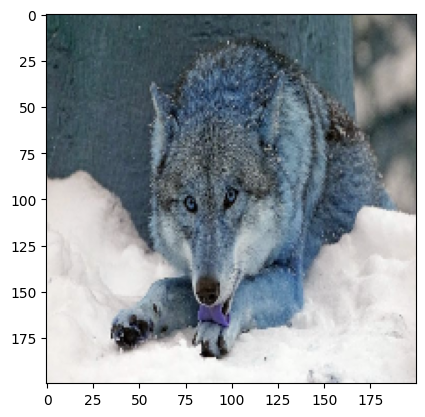

In [ ]:
X,Y=create_features_labels("data/train")

load_model.model.evaluate(X,Y)

X_test,Y_test=create_features_labels('data/test internet')

load_model.model.evaluate(X_test,Y_test)
plt.imshow(X[1])

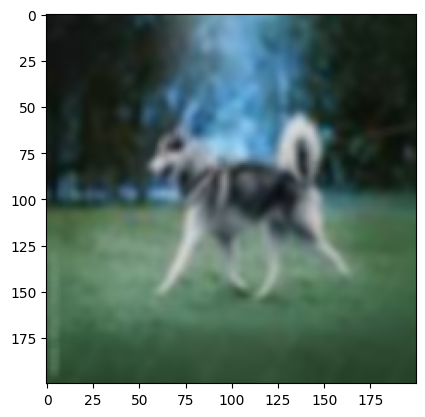

In [ ]:
X_blurred=np.array([cv.blur(img,(5,5)) for img in X])
plt.imshow(X_blurred[0])


In [ ]:

load_model.model.fit(X,Y,epochs=5)

Epoch 1/5
3/3 [==============================] - 6s 1s/step - loss: 0.4241 - accuracy: 0.8375
Epoch 2/5
3/3 [==============================] - 4s 988ms/step - loss: 0.3476 - accuracy: 0.9375
Epoch 3/5
3/3 [==============================] - 3s 781ms/step - loss: 0.2772 - accuracy: 0.9500
Epoch 4/5
3/3 [==============================] - 2s 620ms/step - loss: 0.2270 - accuracy: 0.9125
Epoch 5/5
3/3 [==============================] - 3s 778ms/step - loss: 0.1830 - accuracy: 0.9625


In [ ]:
load_model.model.save("wolf_husky_classifier")

INFO:tensorflow:Assets written to: wolf_husky_classifier/assets


INFO:tensorflow:Assets written to: wolf_husky_classifier/assets


In [ ]:
*/uhjjjjjjjjjjjokkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhn